In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [42]:
cd F:\Fingertips\6_ML\Linear_Regression\project

F:\Fingertips\6_ML\Linear_Regression\project


In [43]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [44]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
df1=df.copy()
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Feature engg and feature selection

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [52]:
df2=df1.copy()
df2[['age','bmi']]=scaler.fit_transform(df2[['age','bmi']])
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0,16884.92400,0,1,0,0,1
1,0.000000,0.479150,1,1725.55230,1,0,0,1,0
2,0.217391,0.458434,3,4449.46200,1,0,0,1,0
3,0.326087,0.181464,0,21984.47061,1,0,1,0,0
4,0.304348,0.347592,0,3866.85520,1,0,1,0,0


In [53]:
df2[['children','charges']]=scaler.fit_transform(df2[['children','charges']])
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0,1,0,0,1
1,0.000000,0.479150,0.2,0.009636,1,0,0,1,0
2,0.217391,0.458434,0.6,0.053115,1,0,0,1,0
3,0.326087,0.181464,0.0,0.333010,1,0,1,0,0
4,0.304348,0.347592,0.0,0.043816,1,0,1,0,0


In [54]:
X=df2.drop('charges',axis=1)
y=df2.charges

In [55]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0,1,0,0,1
1,0.000000,0.479150,0.2,1,0,0,1,0
2,0.217391,0.458434,0.6,1,0,0,1,0
3,0.326087,0.181464,0.0,1,0,1,0,0
4,0.304348,0.347592,0.0,1,0,1,0,0


In [56]:
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

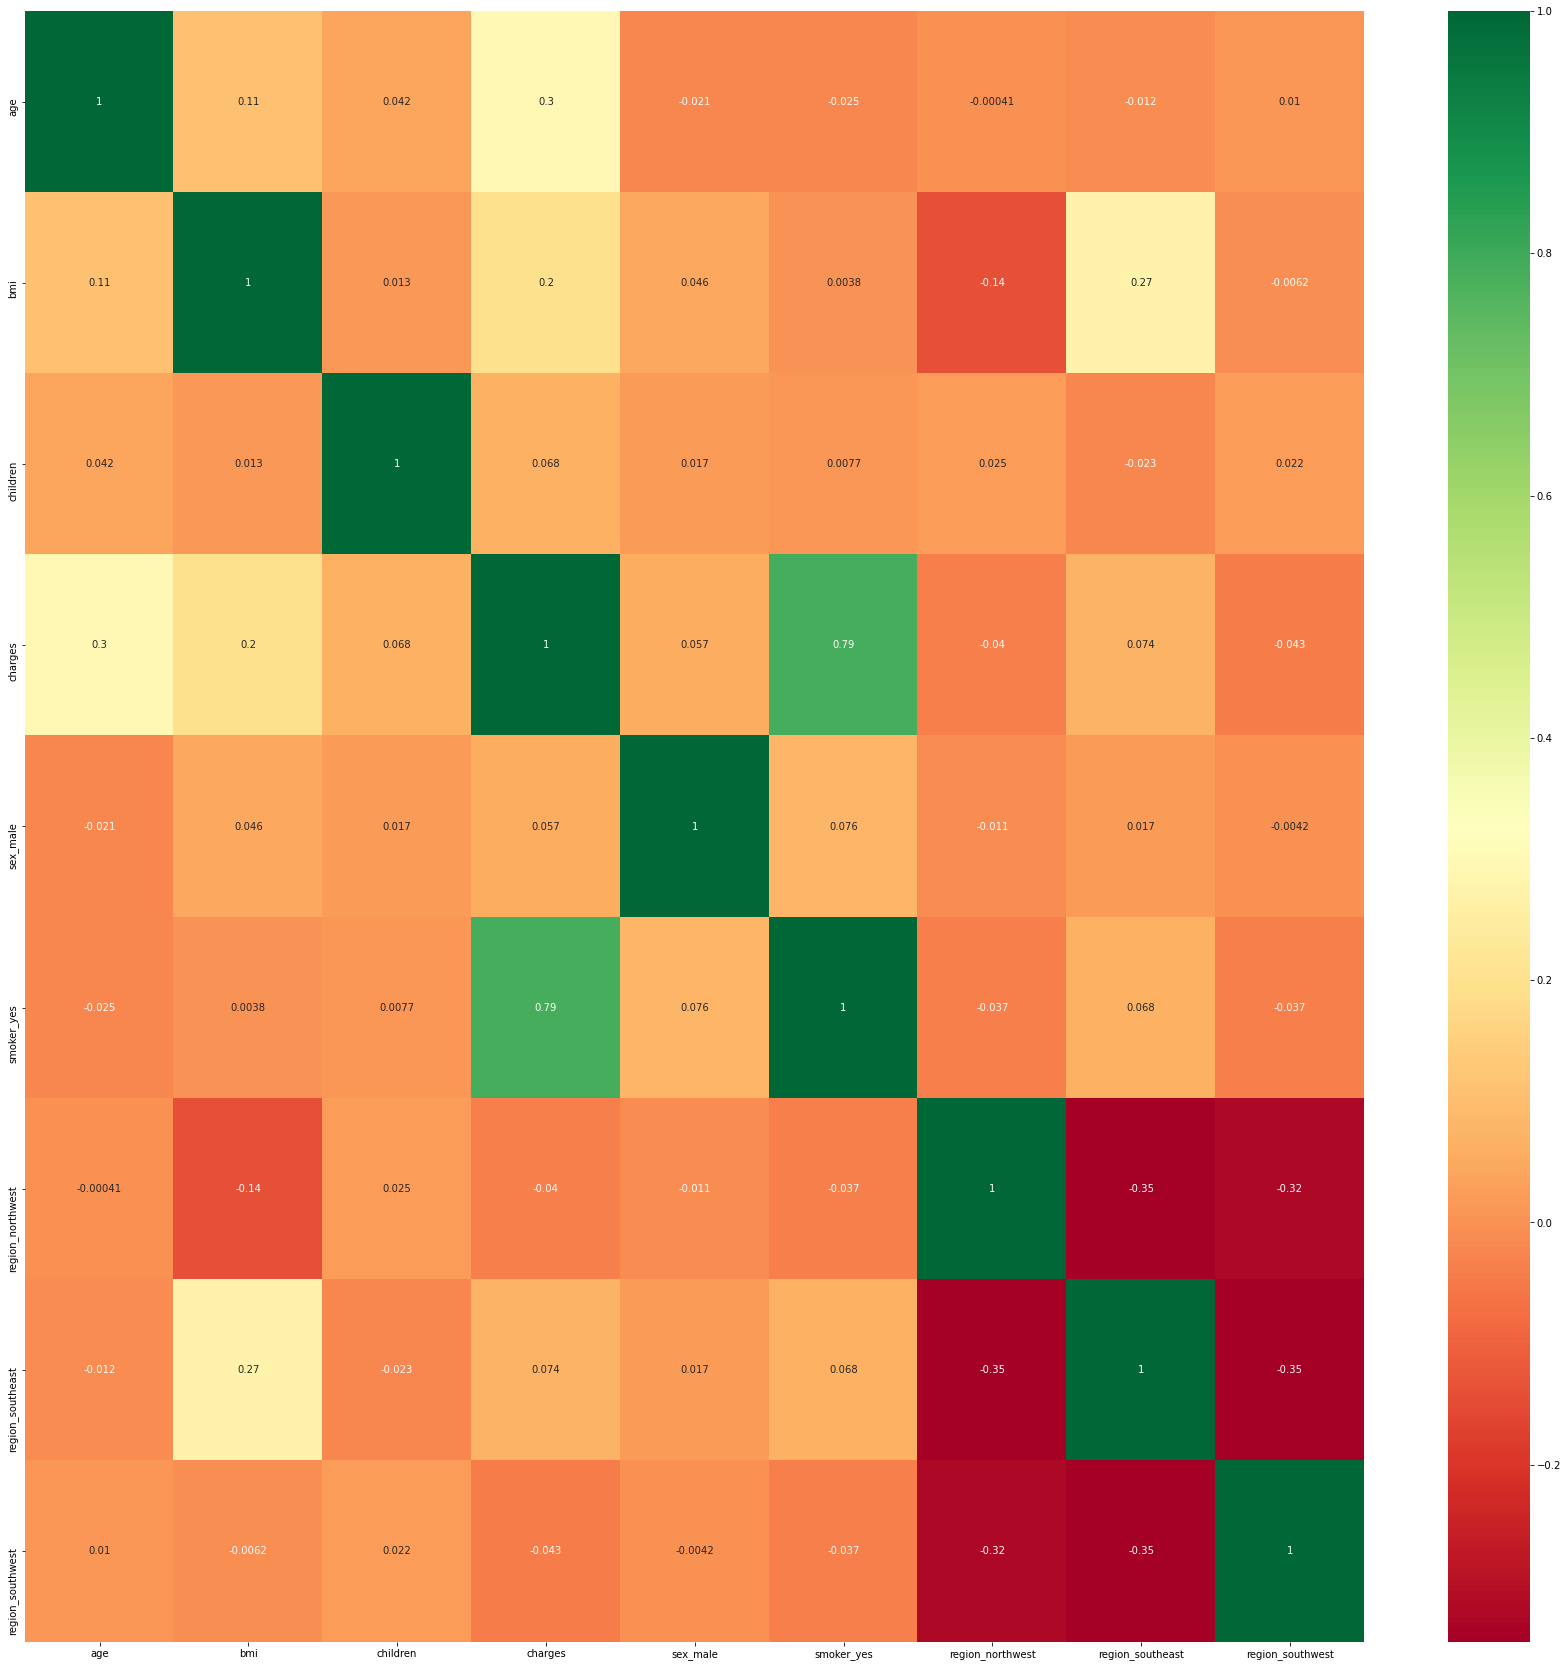

In [57]:
plt.figure(figsize = (30,30))
sns.heatmap(df2.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [59]:
print(selection.feature_importances_)

[0.1289829  0.19145167 0.02453997 0.01028832 0.62059197 0.0094367
 0.00878312 0.00592535]


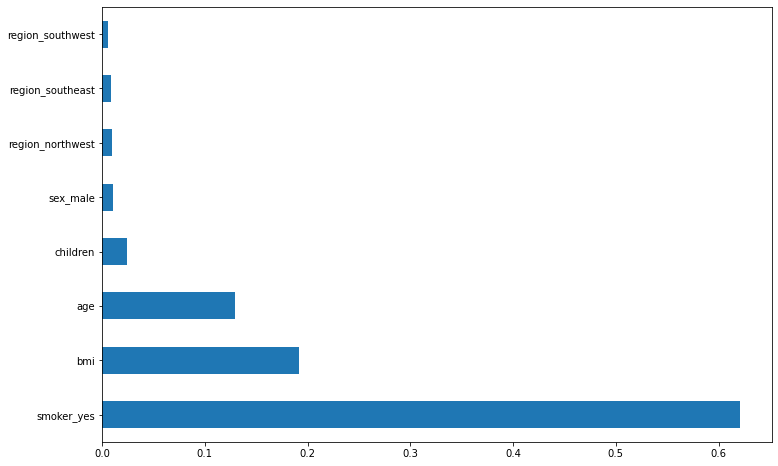

In [62]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [64]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1204,0.000000,0.304547,0.6,0,1,0,1,0
829,0.456522,0.158461,0.2,1,0,1,0,0
1077,0.065217,0.270917,0.0,1,0,0,0,0
416,0.739130,0.488028,0.0,1,0,0,1,0
1295,0.043478,0.162497,0.2,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1242,0.086957,0.143126,0.6,0,0,1,0,0
924,0.543478,0.194781,0.0,1,0,0,0,1
1247,0.326087,0.361582,0.8,1,0,0,0,1
271,0.695652,0.490718,0.4,1,1,0,0,1


In [65]:
y_train

1204    0.272976
829     0.079740
1077    0.015649
416     0.128001
1295    0.013455
          ...   
1242    0.050670
924     0.081862
1247    0.078809
271     0.666176
474     0.387246
Name: charges, Length: 1070, dtype: float64

In [66]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
698,0.826087,0.477939,0.0,1,0,1,0,0
520,0.695652,0.306699,0.0,0,0,0,0,0
1144,0.695652,0.439602,0.4,1,0,0,0,1
908,0.978261,0.641377,0.6,1,0,0,0,1
559,0.021739,0.526500,0.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
851,0.934783,0.439602,0.4,1,0,1,0,0
109,0.978261,0.514662,0.0,1,1,0,1,0
941,0.695652,0.810600,0.2,0,0,0,1,0
600,0.000000,0.624159,0.0,0,0,0,1,0


In [67]:
y_test

698     0.157296
520     0.391624
1144    0.135814
908     0.224238
559     0.008373
          ...   
851     0.207471
109     0.733196
941     0.134523
600     0.008159
865     0.087448
Name: charges, Length: 268, dtype: float64

In [68]:
reg_mod=LinearRegression()
reg_mod.fit(X_train,y_train)

LinearRegression()

In [69]:
predicted_charge=reg_mod.predict(X_test)
predicted_charge

array([ 1.94628723e-01,  1.41267296e-01,  1.68557724e-01,  2.69896844e-01,
        5.79160894e-02,  1.65736026e-02,  1.78257379e-02,  1.71682029e-01,
        5.93610884e-01,  1.64239709e-01,  2.43881704e-01,  4.43545889e-01,
        3.32399605e-02,  1.92067156e-01,  4.57049835e-01,  1.35599836e-01,
        4.93449503e-01,  1.77125572e-01,  3.04531102e-02,  1.58577639e-01,
        6.04204608e-01,  1.12499821e-01,  1.69368167e-01,  1.82541455e-02,
        1.83326850e-01,  8.00874500e-02,  5.06206088e-01,  1.88511212e-01,
        4.39932252e-01,  1.76209968e-01,  1.43622685e-01,  2.67167984e-02,
        5.94287806e-01,  5.98089148e-01,  2.20041498e-01,  9.40788494e-02,
        4.33882650e-02, -2.79938306e-03,  4.89823903e-01,  3.95704785e-01,
        1.79631545e-01,  2.42777246e-01,  1.34561851e-02,  4.14541501e-04,
        1.95035201e-01,  1.18134889e-01,  1.53114998e-01,  7.51677247e-02,
        5.90238663e-01,  1.95832924e-02,  1.78634617e-01,  5.50706050e-01,
        1.41876936e-01,  

In [70]:
# Actual data
y_test

698     0.157296
520     0.391624
1144    0.135814
908     0.224238
559     0.008373
          ...   
851     0.207471
109     0.733196
941     0.134523
600     0.008159
865     0.087448
Name: charges, Length: 268, dtype: float64

In [71]:
reg_mod.score(X_train,y_train)

0.7386584208518752

In [72]:
reg_mod.score(X_test,y_test)

0.7959688488543414

In [74]:
mae=mean_absolute_error(y_test,predicted_charge)
mse=mean_squared_error(y_test,predicted_charge)
r2 = r2_score(y_test,predicted_charge) 

print('Slope:' ,reg_mod.coef_) 
print('Intercept:', reg_mod.intercept_) 
print('Mean absolute error: ', mae)
print('Root mean squared error: ', mse) 
print('R2 score: ', r2)

Slope: [ 0.18217684  0.20223999  0.04523631 -0.00248412  0.37860349 -0.00254828
 -0.01021761 -0.01519826]
Intercept: -0.04749120839608245
Mean absolute error:  0.06452184301705384
Root mean squared error:  0.007817077736002159
R2 score:  0.7959688488543414


# trying different regression algo

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

model = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,y_train)
    print(mod , 'accuracy',reg.score(X_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.8117277949821642
<class 'sklearn.svm._classes.SVR'> accuracy 0.7341338593126445
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.8865187787637394
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.8321870828363187
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.8586938058278649


# applying kfold cross validation technique

In [81]:
from sklearn.model_selection import KFold,cross_val_score

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))
models.append(('AdaBoost', AdaBoostRegressor()))

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.741396934117559
CART 0.6916685237588951
RF 0.8188091744017179
SVM 0.6937028091951157
AdaBoost 0.8035229472409451


# As randomforestregressor has a high accuracy, therefore using randomforestregressor algo

In [82]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

0.9739164468856368

In [84]:
reg_rf.score(X_test, y_test)

0.8861794690239859

# performing hyperparameter tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [87]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

# applying best parameters and calculating accuracy

In [93]:
new_reg_rf = RandomForestRegressor(n_estimators=700,min_samples_split= 5,min_samples_leaf= 10,max_features= 'auto',max_depth= 20)
new_reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=700)

In [95]:
y_pred = new_reg_rf.predict(X_test)
new_reg_rf.score(X_train, y_train)

0.8820785381528748

In [96]:
new_reg_rf.score(X_test, y_test)

0.9037781808941934

F:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


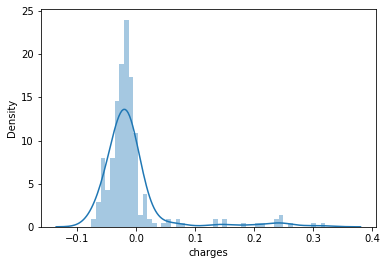

In [97]:
sns.distplot(y_test-y_pred)
plt.show()

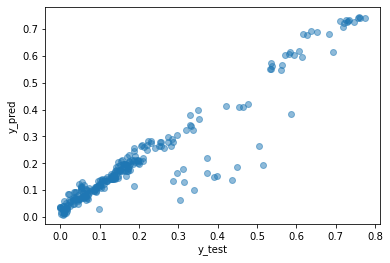

In [98]:
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test, y_pred, alpha = 0.5)

plt.show()

In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("mean_absolute_error:",mean_absolute_error(y_test, y_pred))
print("mean_squared_error:",mean_squared_error(y_test, y_pred))
print("r2_score:",r2_score(y_test, y_pred))

mean_absolute_error: 0.035501844096027156
mean_squared_error: 0.0036865617609178132
r2_score: 0.9037781808941934
